# Rigathi Gachagua impeachment X sentiments

## 1. Business Understanding
### Objective:
* Primary Goal: To understand public sentiment about Rigathi Gachagua's impeachment.
* Secondary Goals:
  Identify major themes or topics of conversation.
  Find which sentiments (positive, negative, neutral) correlate with higher engagement (likes/retweets).
  Track how sentiment evolves over time as the impeachment unfolds.
  
## 2. Data Understanding

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('gachagua.csv')
df.head()

,Tweet_count,Username,Text,Created At,Retweets,Likes
0,1,SUPER METRO 🇰🇪,"Fun fact, Rigathi Gachagua is more intelligent...",Tue Oct 08 16:01:36 +0000 2024,1149,7074
1,2,Abdulahi Adan,"""Mr. Speaker you seat hear today because you n...",Tue Oct 08 15:31:13 +0000 2024,2755,10749
2,3,Aadoo Ozzo🇵🇸,"""I made my money during Kibaki's era when the ...",Mon Oct 07 16:55:45 +0000 2024,3229,14176
3,4,"H.E. Rigathi Gachagua, EGH","1 Thessalonians 5:18 \n\n""Give thanks in all c...",Tue Oct 08 19:35:15 +0000 2024,2336,13309
4,5,Kijana Ya Atwoli ( parody ),Rigathi Gachagua is not the problem its Ruto !...,Mon Oct 07 19:59:42 +0000 2024,4473,13777


In [3]:
# Inspect the data
display(df.info())
display(df.describe())

# Check for missing values
print('\nCheck for missing values')
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet_count  1217 non-null   int64 
 1   Username     1217 non-null   object
 2   Text         1217 non-null   object
 3   Created At   1217 non-null   object
 4   Retweets     1217 non-null   int64 
 5   Likes        1217 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 57.2+ KB


None

,Tweet_count,Retweets,Likes
count,1217.000000,1217.000000,1217.000000
mean,609.000000,328.152013,1602.902219
std,351.461947,727.332867,2991.109926
min,1.000000,0.000000,0.000000
25%,305.000000,5.000000,25.000000
50%,609.000000,54.000000,217.000000
75%,913.000000,325.000000,1733.000000
max,1217.000000,7903.000000,34007.000000



Check for missing values


Tweet_count    0
Username       0
Text           0
Created At     0
Retweets       0
Likes          0
dtype: int64

The data has no missing values.

#### Plot histograms of retweets and likes to see the distribution.

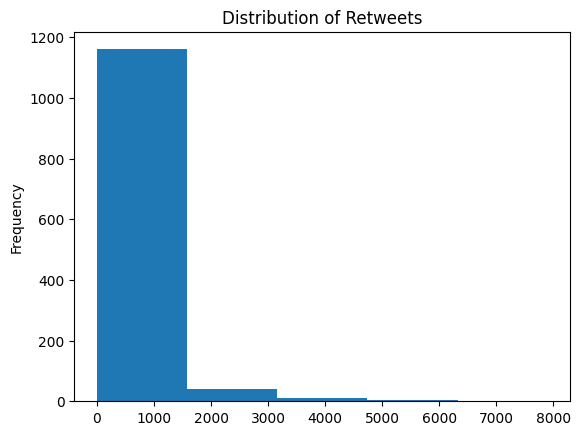

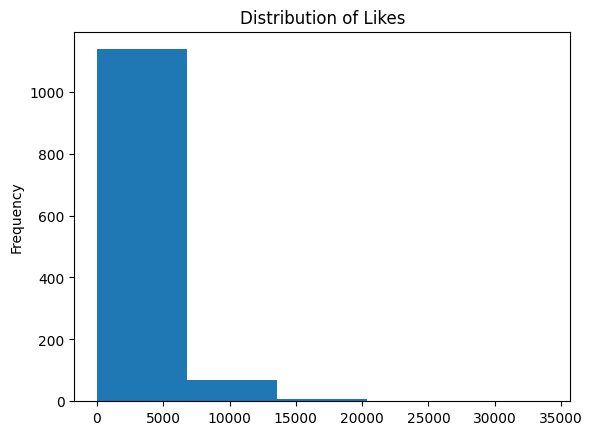

In [4]:
# Plot Retweets and Likes distribution
df['Retweets'].plot(kind='hist', bins=5, title='Distribution of Retweets')
plt.show()

df['Likes'].plot(kind='hist', bins=5, title='Distribution of Likes')
plt.show()


## 3. Data Preparation
We’ll clean the tweet text and prepare it for sentiment analysis:

### Text Cleaning
Clean the text to remove unnecessary elements like mentions, URLs and special characters.

In [5]:
def clean_text(text):
    # Remove mentions, URLs and non-alphabetical characters
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()  # Convert to lowercase
    return text

# Apply the text cleaning function
df['clean_text'] = df['Text'].apply(clean_text)


Tokenization, Stopword Removal and Lemmatization

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df['processed_text'] = df['clean_text'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package stopwords to /home/simon-
[nltk_data]     makumi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/simon-
[nltk_data]     makumi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/simon-
[nltk_data]     makumi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/simon-makumi/nltk_data'
    - '/home/simon-makumi/anaconda3/envs/learn-env/nltk_data'
    - '/home/simon-makumi/anaconda3/envs/learn-env/share/nltk_data'
    - '/home/simon-makumi/anaconda3/envs/learn-env/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
